In [2]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import datetime
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
print(__version__) #versione >= 1.9.0
from pandas_datareader import data as pdr

4.5.0


In [5]:
data = pd.read_excel(r'C:\Users\frsim\Desktop\dataset allocazione ptf stocks\B\MHK US Equity.xlsx')
data.head()

,DATA,PX_LAST,PX_ASK,PX_BID,NET_INCOME_MARGIN_ADJUSTED,WACC_COST_DEBT,BS_ST_BORROW,BS_LT_BORROW,IS_RD_EXPEND,PX_TO_BOOK_RATIO,...,GEO_GROW_EBITDA,NET_INC_GROWTH,GEO_GROW_NET_INC,BEST_EPS_NXT_YR,MOV_AVG_50D,MOV_AVG_200D,RSI_14D,RSI_30D,RSI_9D,PX_VOLUME
0,2013-12-31,148.90,148.91,148.90,7.0948,3.3894,127.218,2132.79,0,2.4261,...,0.0,42.5703,0.0,0.0,138.8840,123.2779,65.1380,65.1935,67.9928,533632
1,2014-01-01,148.90,148.91,148.90,7.0948,3.3894,127.218,2132.79,0,2.4261,...,0.0,42.5703,0.0,0.0,138.8840,123.2779,65.1380,65.1935,67.9928,533632
2,2014-01-02,149.11,149.10,149.07,7.0948,3.3894,127.218,2132.79,0,2.4295,...,0.0,42.5703,0.0,0.0,139.3660,123.4603,65.4500,65.3393,68.4927,676997
3,2014-01-03,149.45,149.48,149.47,7.0948,3.3894,127.218,2132.79,0,2.4351,...,0.0,42.5703,0.0,0.0,139.8022,123.6346,65.9809,65.5808,69.3643,521291
4,2014-01-06,147.34,147.40,147.36,7.0948,3.3894,127.218,2132.79,0,2.4007,...,0.0,42.5703,0.0,0.0,140.1838,123.8148,59.8358,62.7730,58.1367,470527


In [6]:
data['DATA'] = pd.to_datetime(data['DATA'])
data.head()

,DATA,PX_LAST,PX_ASK,PX_BID,NET_INCOME_MARGIN_ADJUSTED,WACC_COST_DEBT,BS_ST_BORROW,BS_LT_BORROW,IS_RD_EXPEND,PX_TO_BOOK_RATIO,...,GEO_GROW_EBITDA,NET_INC_GROWTH,GEO_GROW_NET_INC,BEST_EPS_NXT_YR,MOV_AVG_50D,MOV_AVG_200D,RSI_14D,RSI_30D,RSI_9D,PX_VOLUME
0,2013-12-31,148.90,148.91,148.90,7.0948,3.3894,127.218,2132.79,0,2.4261,...,0.0,42.5703,0.0,0.0,138.8840,123.2779,65.1380,65.1935,67.9928,533632
1,2014-01-01,148.90,148.91,148.90,7.0948,3.3894,127.218,2132.79,0,2.4261,...,0.0,42.5703,0.0,0.0,138.8840,123.2779,65.1380,65.1935,67.9928,533632
2,2014-01-02,149.11,149.10,149.07,7.0948,3.3894,127.218,2132.79,0,2.4295,...,0.0,42.5703,0.0,0.0,139.3660,123.4603,65.4500,65.3393,68.4927,676997
3,2014-01-03,149.45,149.48,149.47,7.0948,3.3894,127.218,2132.79,0,2.4351,...,0.0,42.5703,0.0,0.0,139.8022,123.6346,65.9809,65.5808,69.3643,521291
4,2014-01-06,147.34,147.40,147.36,7.0948,3.3894,127.218,2132.79,0,2.4007,...,0.0,42.5703,0.0,0.0,140.1838,123.8148,59.8358,62.7730,58.1367,470527


In [7]:
def df_shift(data,lag=0, start=1, skip=1, rejected_columns = []):
    data = data.copy()
    if not lag:
        return data
    cols ={}
    for i in range(start,lag+1,skip):
        for x in list(data.columns):
            if x not in rejected_columns:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=data.index)    
        i = (skip - 1)
        for c in columns:
            dfn[c] = data[k].shift(periods=i)
            i+=skip
        data = pd.concat([data, dfn], axis=1, join_axes=[data.index])
    return data

In [8]:
data = data[['DATA','PX_LAST']]
data.head(1)

,DATA,PX_LAST
0,2013-12-31,148.9


In [9]:
df_crosscorrelated = df_shift(data, lag = 10, start = 1, skip = 2,rejected_columns=['DATA'])
df_crosscorrelated['ma7'] = df_crosscorrelated['PX_LAST'].rolling(7).mean()
df_crosscorrelated['ma14'] = df_crosscorrelated['PX_LAST'].rolling(14).mean()
df_crosscorrelated['ma25'] = df_crosscorrelated['PX_LAST'].rolling(25).mean()
df_crosscorrelated.head(10)

C:\Users\frsim\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



,DATA,PX_LAST,PX_LAST_1,PX_LAST_3,PX_LAST_5,PX_LAST_7,PX_LAST_9,ma7,ma14,ma25
0,2013-12-31,148.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-01,148.90,148.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-02,149.11,148.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-03,149.45,149.11,148.90,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-06,147.34,149.45,148.90,NaN,NaN,NaN,NaN,NaN,NaN
5,2014-01-07,145.69,147.34,149.11,148.90,NaN,NaN,NaN,NaN,NaN
6,2014-01-08,147.10,145.69,149.45,148.90,NaN,NaN,148.070000,NaN,NaN
7,2014-01-09,146.03,147.10,147.34,149.11,148.90,NaN,147.660000,NaN,NaN
8,2014-01-10,148.23,146.03,145.69,149.45,148.90,NaN,147.564286,NaN,NaN
9,2014-01-13,146.69,148.23,147.10,147.34,149.11,148.9,147.218571,NaN,NaN


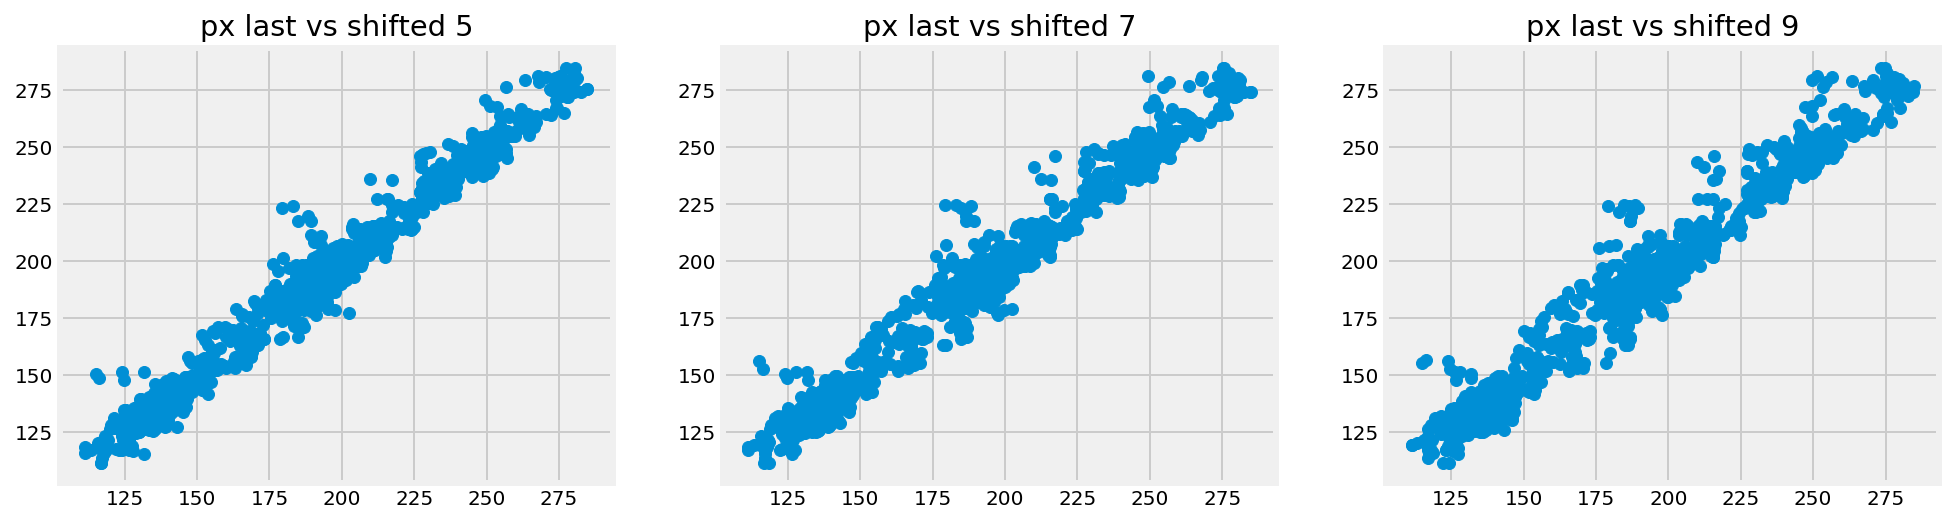

In [10]:
plt.figure(figsize=(15, 4))
plt.subplot(1,3,1)
plt.scatter(df_crosscorrelated['PX_LAST'],df_crosscorrelated['PX_LAST_5'])
plt.title('px last vs shifted 5')
plt.subplot(1,3,2)
plt.scatter(df_crosscorrelated['PX_LAST'],df_crosscorrelated['PX_LAST_7'])
plt.title('px last vs shifted 7')
plt.subplot(1,3,3)
plt.scatter(df_crosscorrelated['PX_LAST'],df_crosscorrelated['PX_LAST_9'])
plt.title('px last vs shifted 9')
plt.show()

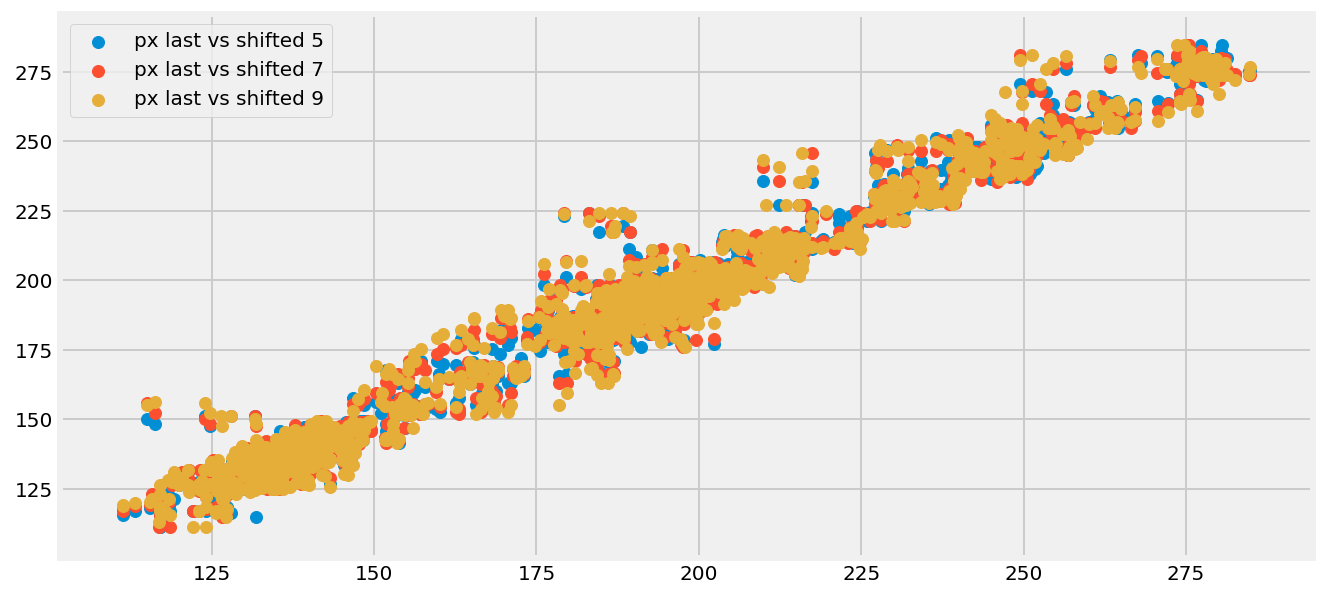

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(df_crosscorrelated['PX_LAST'],df_crosscorrelated['PX_LAST_5'],label='px last vs shifted 5')
plt.scatter(df_crosscorrelated['PX_LAST'],df_crosscorrelated['PX_LAST_7'],label='px last vs shifted 7')
plt.scatter(df_crosscorrelated['PX_LAST'],df_crosscorrelated['PX_LAST_9'],label='px last vs shifted 9')
plt.legend()
plt.show()

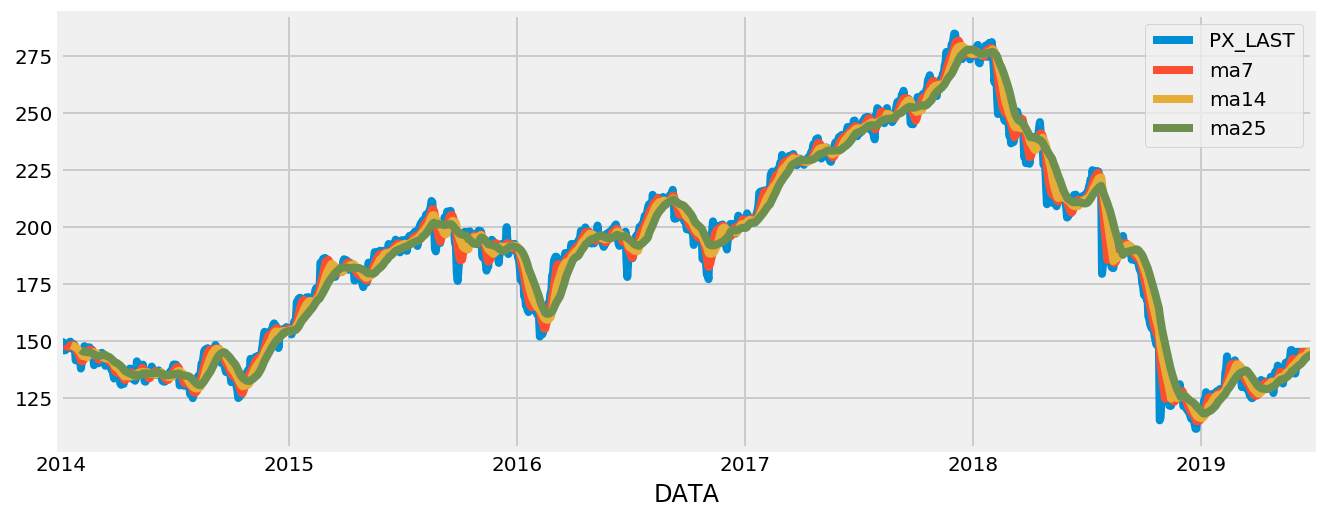

In [12]:
fig, ax = plt.subplots(figsize=(10,4))
df_crosscorrelated.plot(x='DATA',y=['PX_LAST','ma7','ma14','ma25'],ax=ax)
plt.show()

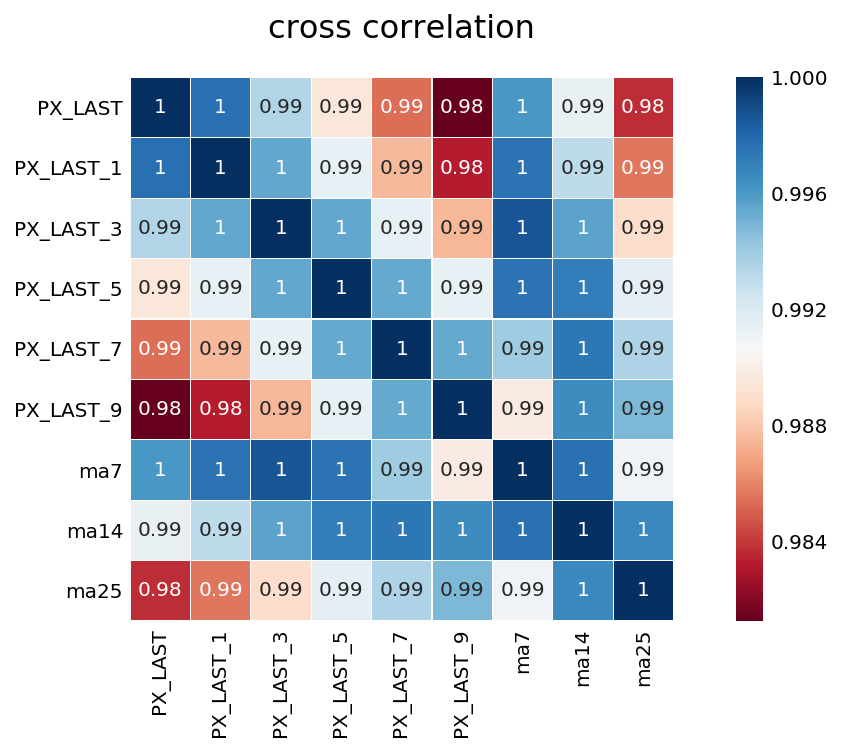

In [13]:
colormap = plt.cm.RdBu
plt.figure(figsize=(10, 5))
ax=plt.subplot(111)
plt.title('cross correlation', y=1.05, size=16)
selected_column = ['PX_LAST','PX_LAST_1','PX_LAST_3','PX_LAST_5','PX_LAST_7','PX_LAST_9','ma7','ma14','ma25']

sns.heatmap(df_crosscorrelated[selected_column].corr(), ax=ax, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

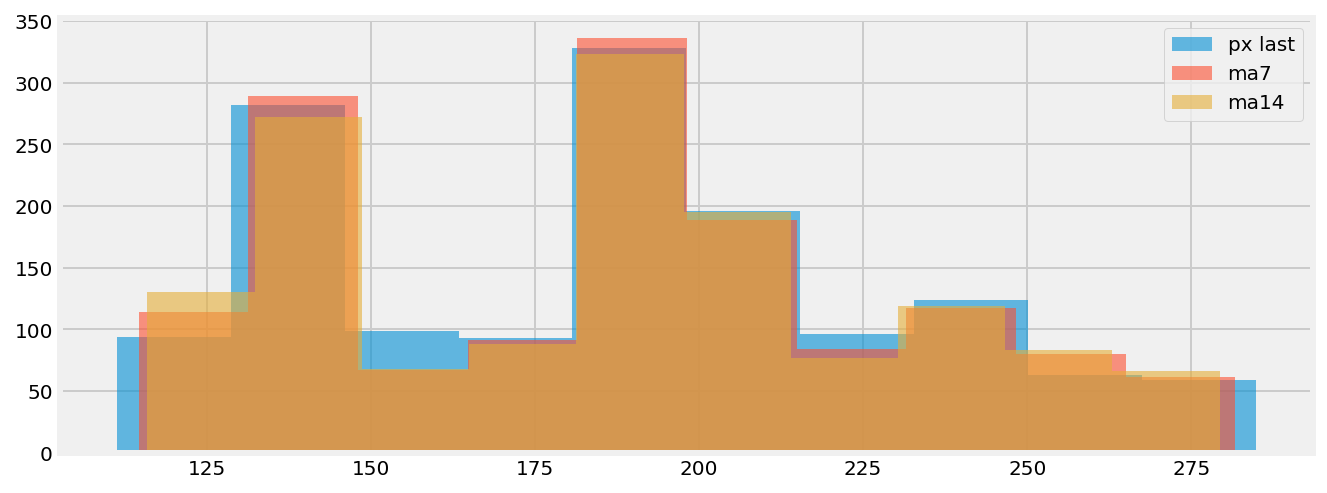

In [14]:
fig, ax = plt.subplots(figsize=(10,4))
df_crosscorrelated['PX_LAST'].hist(alpha=0.6,label='px last',ax=ax)
df_crosscorrelated['ma7'].hist(alpha=0.6,label='ma7',ax=ax)
df_crosscorrelated['ma14'].hist(alpha=0.6,label='ma14',ax=ax)
plt.legend()
plt.show()

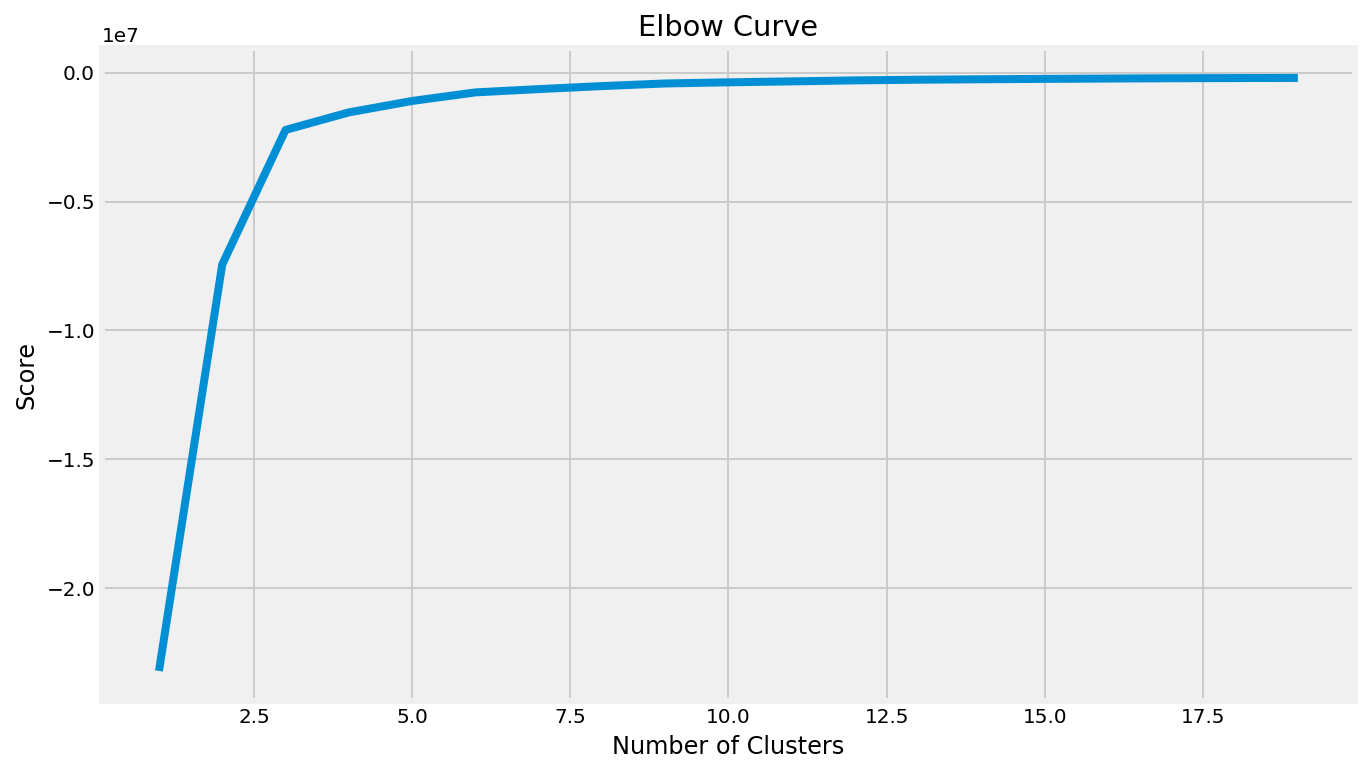

In [15]:
from sklearn.cluster import KMeans

n_cluster = range(1, 20)
data = df_crosscorrelated.iloc[:,1:].dropna().values
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

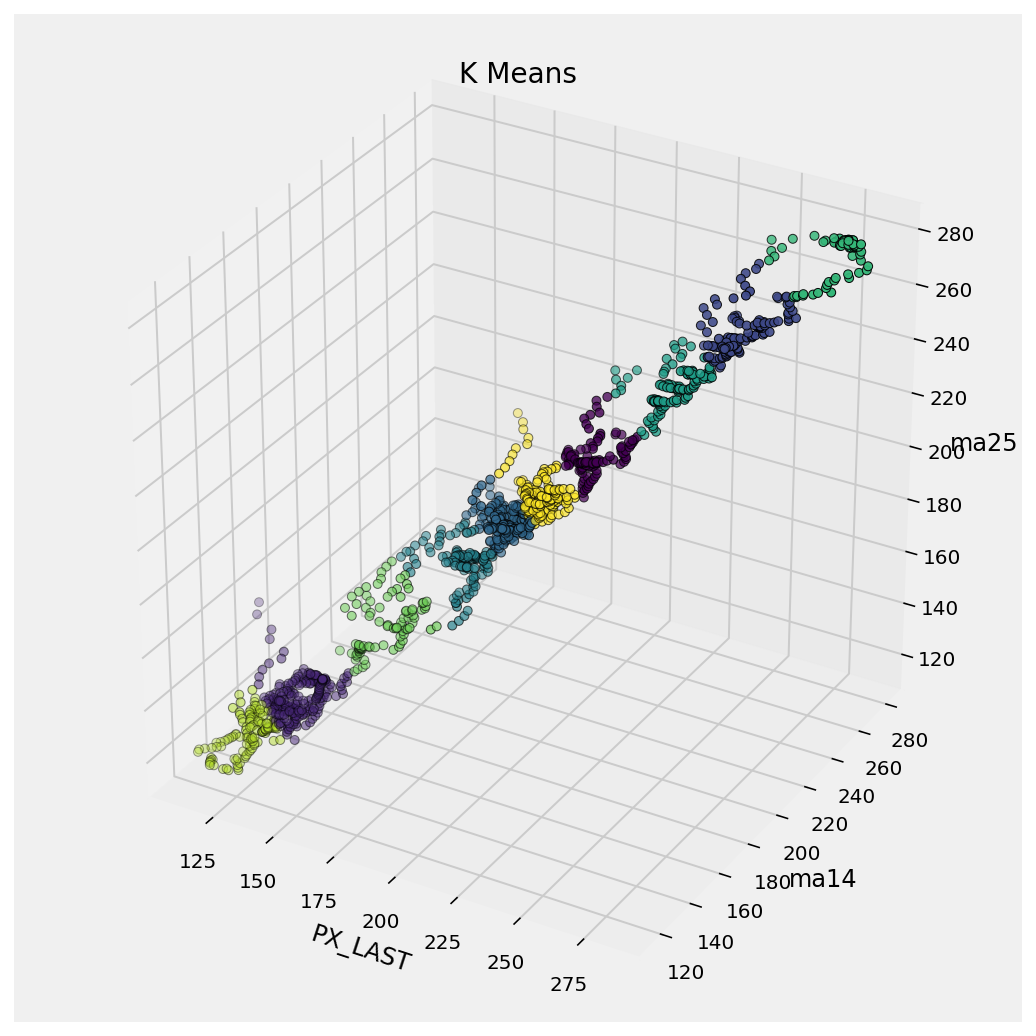

In [16]:
from mpl_toolkits.mplot3d import Axes3D

X = df_crosscorrelated[['PX_LAST','ma14','ma25']].dropna()
X = X.reset_index(drop=True)
km = KMeans(n_clusters=10)
km.fit(X)
km.predict(X)
labels = km.labels_

fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig)
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2],
          c=labels.astype(np.float), edgecolor="k")
ax.set_xlabel("PX_LAST")
ax.set_ylabel("ma14")
ax.set_zlabel("ma25")
plt.title("K Means", fontsize=14)
plt.show()

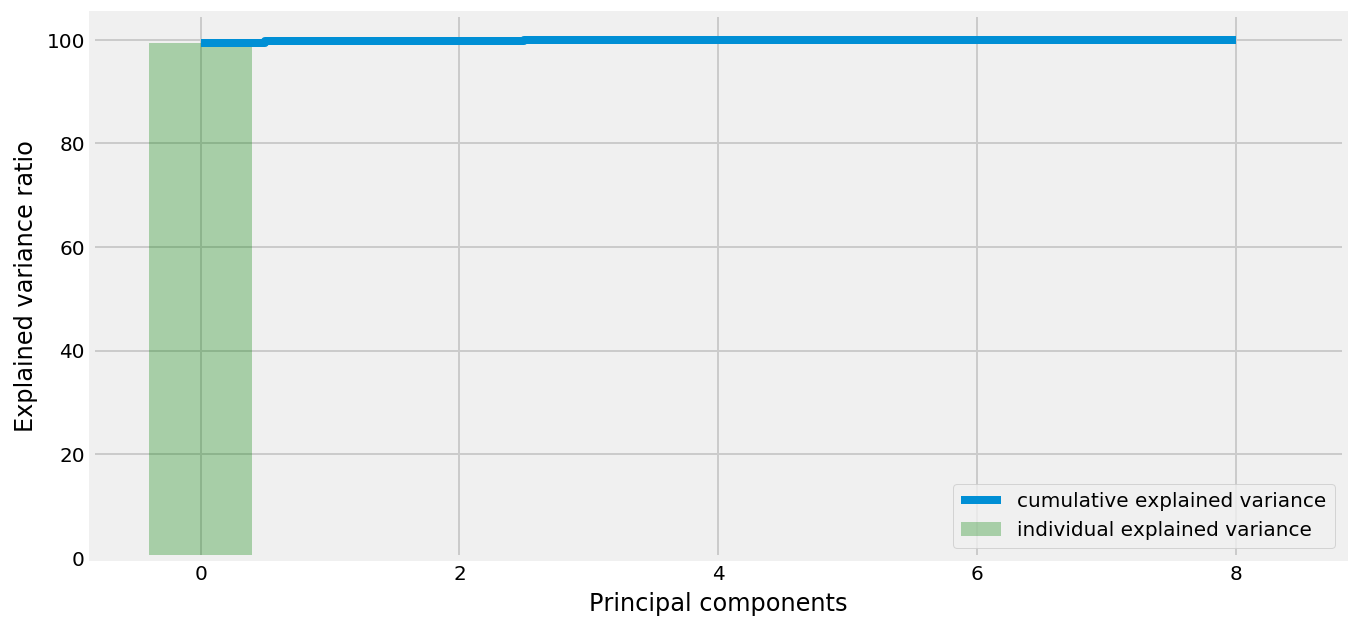

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df_crosscorrelated.iloc[:,1:].dropna().values
X_std = StandardScaler().fit_transform(X)

mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

eig_pairs = [(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort(key = lambda x: x[0], reverse= True)

tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

In [18]:
X = df_crosscorrelated.iloc[:,1:].dropna().values
X_std = StandardScaler().fit_transform(X)
data = pd.DataFrame(X_std)
pca = PCA(n_components=2)
data = pca.fit_transform(data)
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)

In [19]:
data = df_crosscorrelated.dropna()
kmeans = KMeans(n_clusters=10).fit(np_scaled)
data['cluster'] = kmeans.predict(np_scaled)
data = data.reset_index()
data['principal_feature1'] = np_scaled[:,0]
data['principal_feature2'] = np_scaled[:,1]
data['cluster'].value_counts()

C:\Users\frsim\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0    307
2    228
1    192
8    162
5    150
3    128
6    116
4     68
7     41
9     18
Name: cluster, dtype: int64

In [20]:
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = data[i]
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance

outliers_fraction = 0.1
distance = getDistanceByPoint(np_scaled, kmeans)
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
data['anomaly1'] = (distance >= threshold).astype(int)

C:\Users\frsim\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



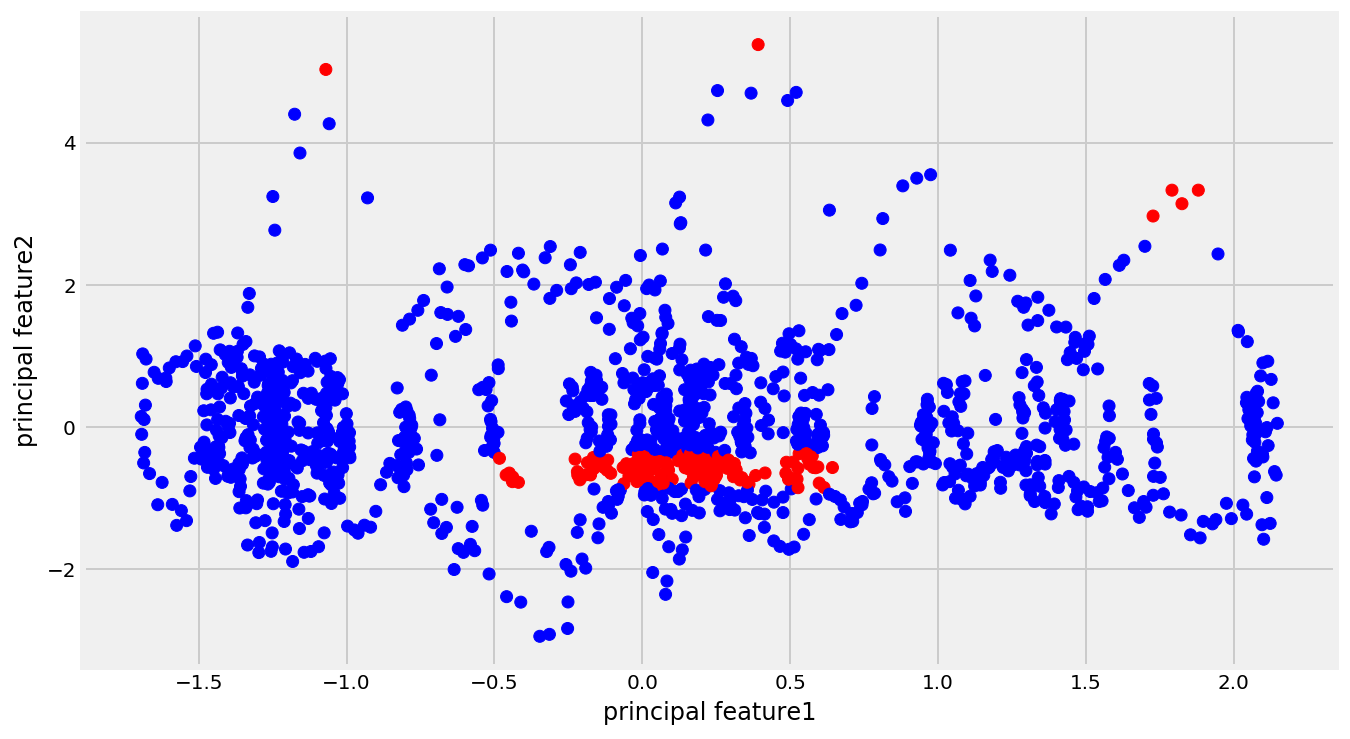

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(data['principal_feature1'], data['principal_feature2'], c=data["anomaly1"].apply(lambda x: colors[x]))
plt.xlabel('principal feature1')
plt.ylabel('principal feature2')
plt.show()

In [22]:
data.anomaly1.value_counts()

0    1269
1     141
Name: anomaly1, dtype: int64

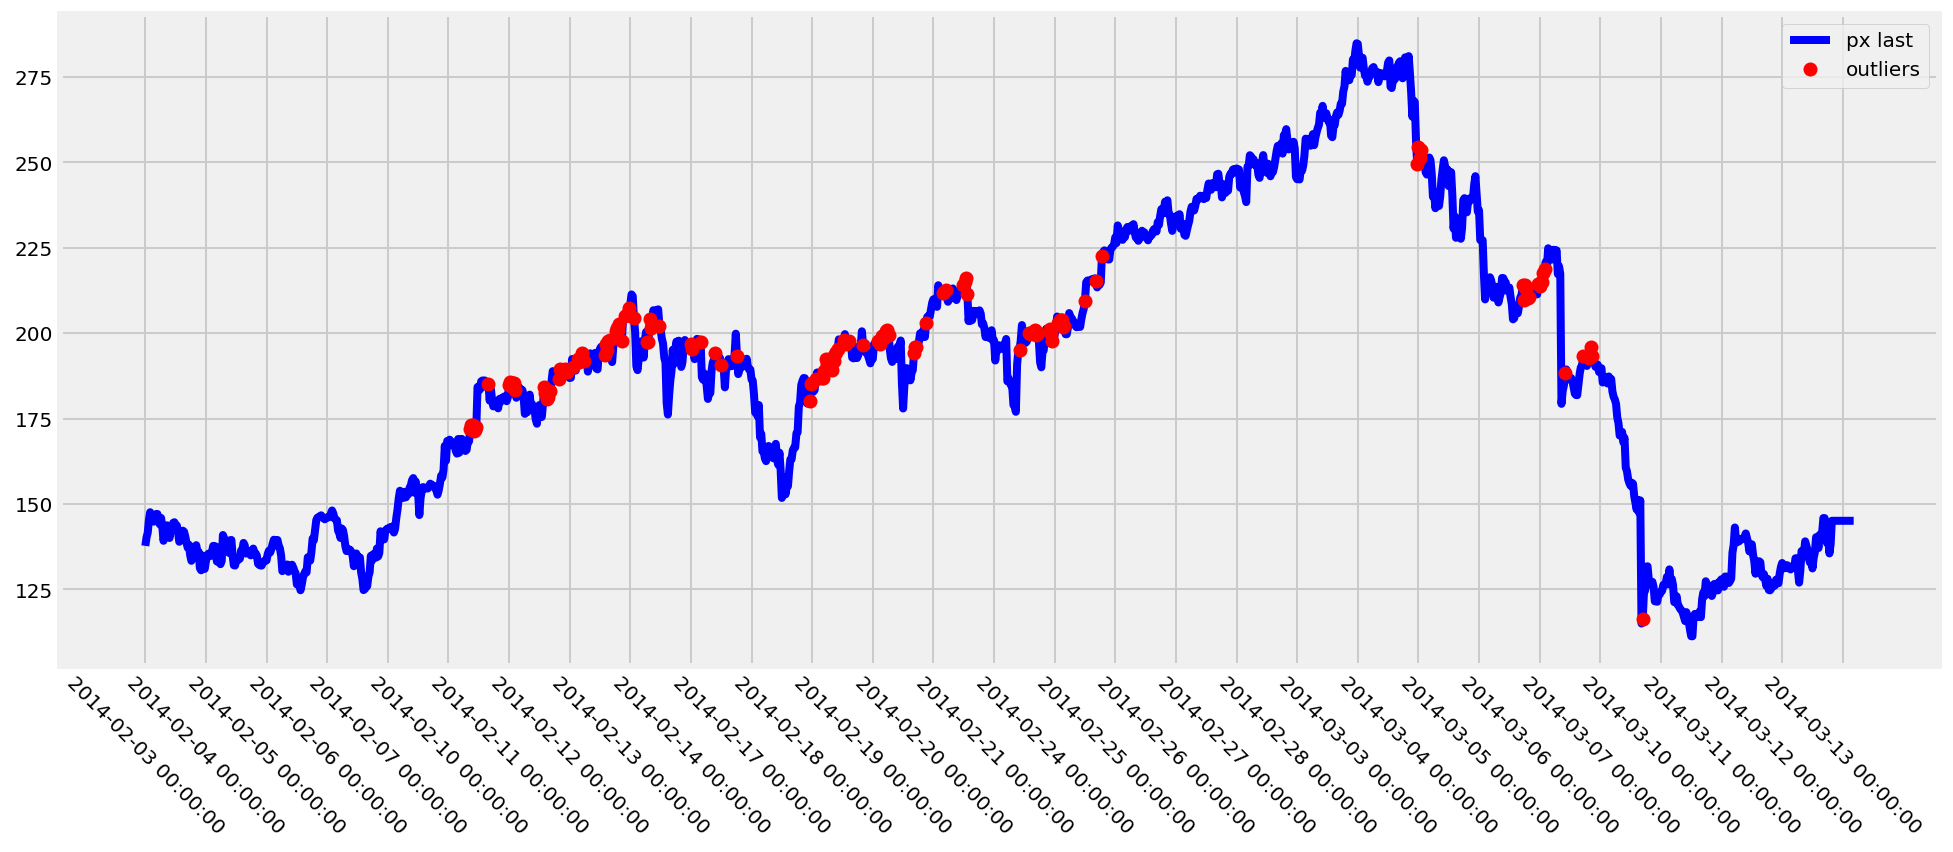

In [25]:
plt.figure(figsize=(15, 6))
plt.plot(data['PX_LAST'], label='px last',c='b')
plt.plot(data['PX_LAST'], 'o', label='outliers',markevery=data.loc[data['anomaly1'] == 1].index.tolist(),c='r')
plt.xticks(np.arange(data.shape[0])[::50],data['DATA'],rotation='-45')
plt.legend()
plt.show()

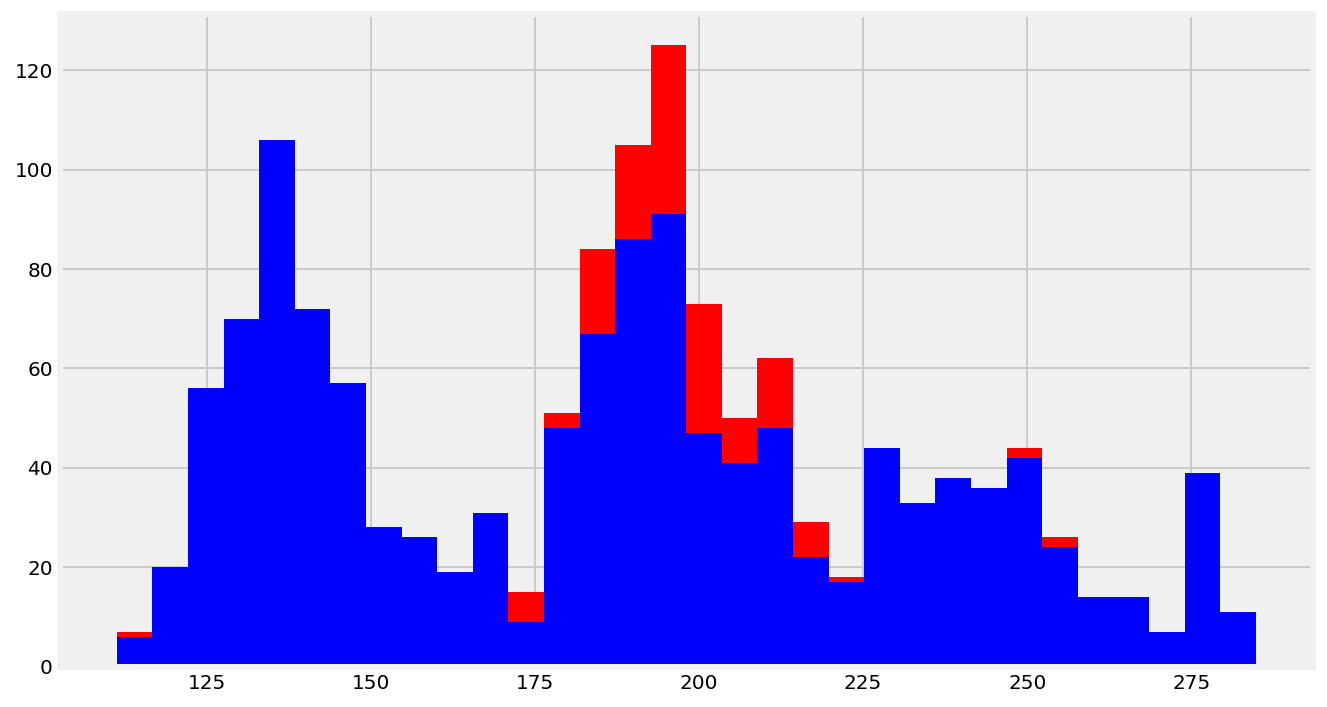

In [26]:
a = data.loc[data['anomaly1'] == 0, 'PX_LAST']
b = data.loc[data['anomaly1'] == 1, 'PX_LAST']

fig, axs = plt.subplots(figsize=(10,6))
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'])
plt.show()

In [27]:
ori_len = df_crosscorrelated.shape[0] - X.shape[0]
ori_len

24

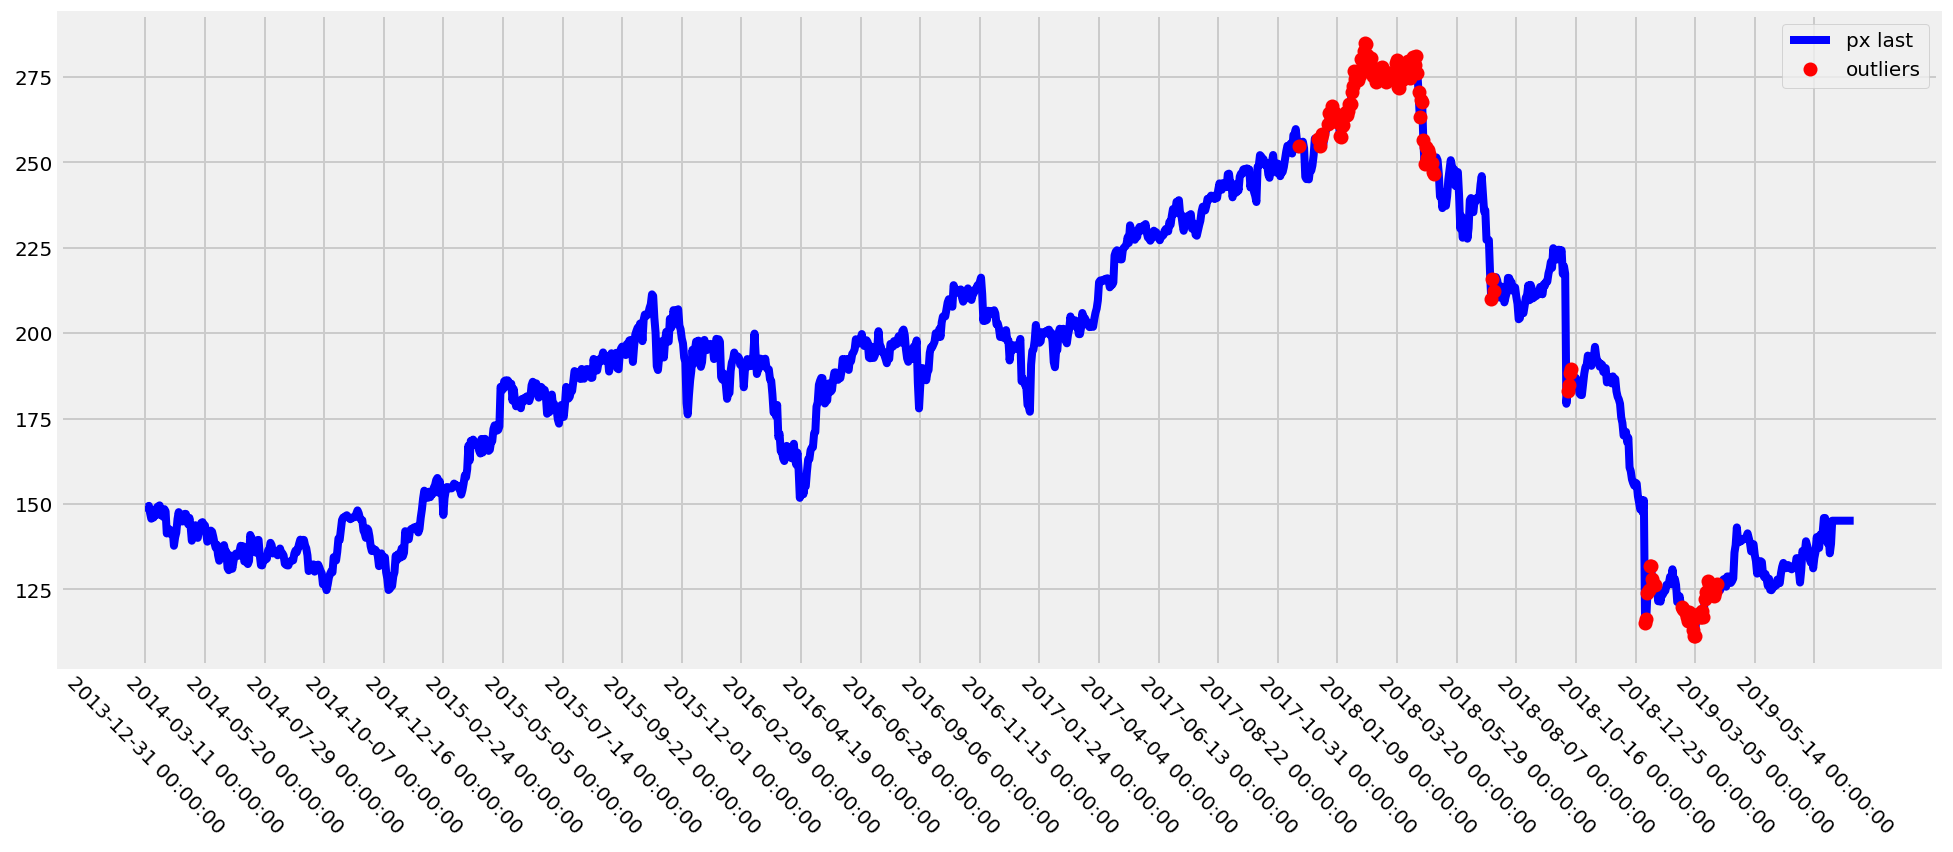

In [28]:
from sklearn.ensemble import IsolationForest

X = df_crosscorrelated.iloc[:,1:].dropna().values
np_scaled = StandardScaler().fit_transform(X)

model = IsolationForest(contamination=outliers_fraction)
model.fit(np_scaled)
outliers = model.predict(np_scaled)

plt.figure(figsize=(15, 6))
plt.plot(df_crosscorrelated['PX_LAST'], label='px last',c='b')
plt.plot(df_crosscorrelated['PX_LAST'], 'o', label='outliers',
         markevery=(np.where(outliers==-1)[0] + ori_len).tolist(),c='r')
plt.xticks(np.arange(df_crosscorrelated.shape[0])[::50],df_crosscorrelated['DATA'][::50],rotation='-45')
plt.legend()
plt.show()

In [29]:
np.where(outliers==-1)[0] + ori_len

array([ 968,  984,  985,  986,  987,  992,  993,  994,  995,  996,  997,
        998,  999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008,
       1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019,
       1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030,
       1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041,
       1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052,
       1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063,
       1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074,
       1075, 1076, 1077, 1078, 1079, 1080, 1081, 1129, 1130, 1131, 1193,
       1194, 1195, 1196, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265,
       1266, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298,
       1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309,
       1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318], dtype=int64)

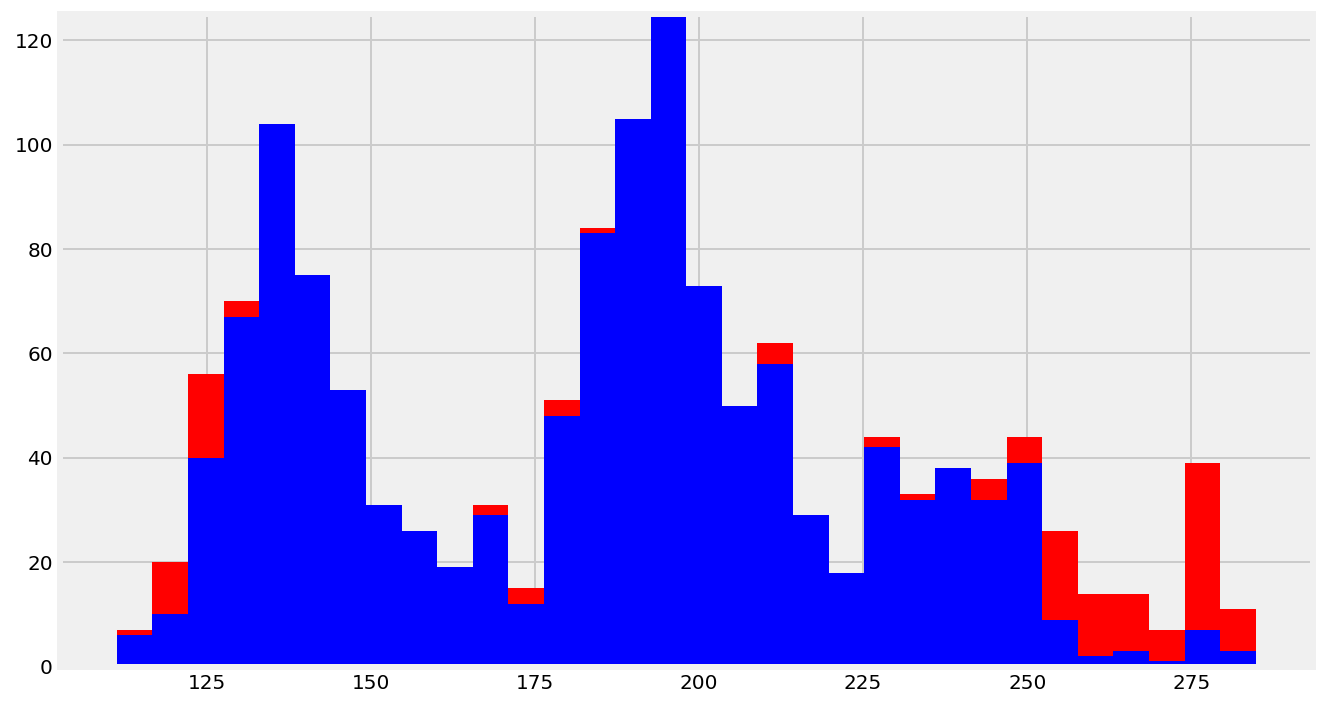

In [30]:
px_last = df_crosscorrelated['PX_LAST'].values
a = px_last[np.where(outliers==1)[0]]
b = px_last[np.where(outliers==-1)[0]]

fig, axs = plt.subplots(figsize=(10,6))
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'])
plt.show()

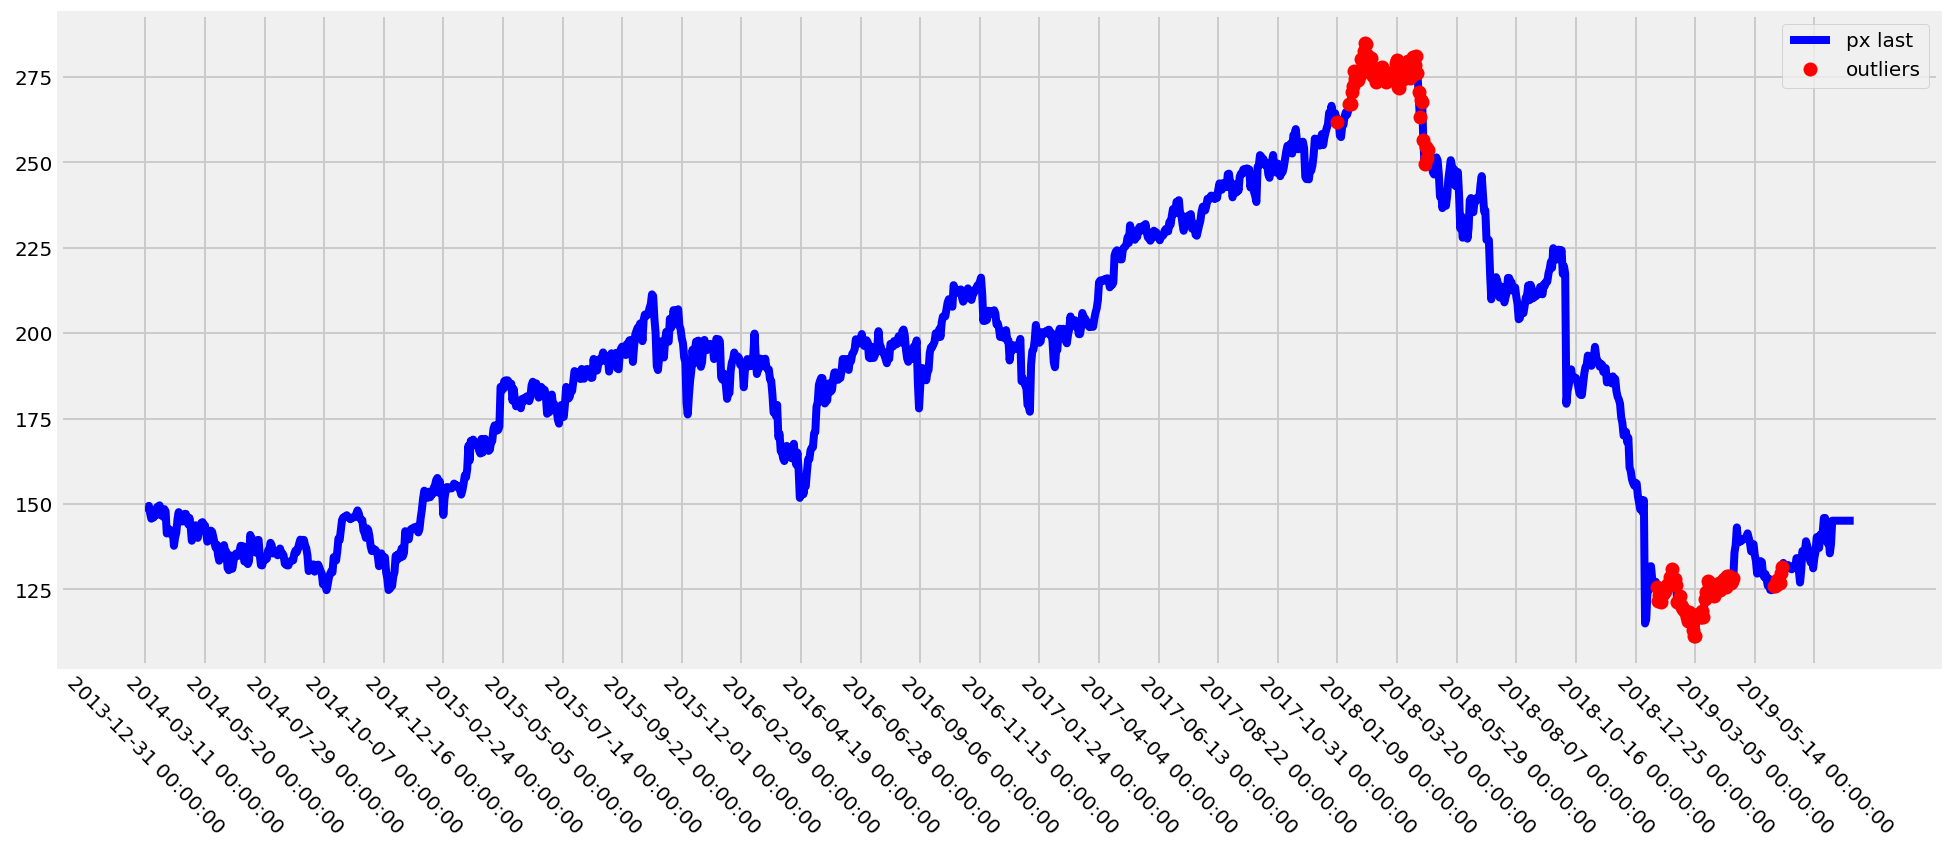

In [31]:
from sklearn.svm import OneClassSVM

X = df_crosscorrelated.iloc[:,1:].dropna().values
np_scaled = StandardScaler().fit_transform(X)
model = OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.01)
model.fit(np_scaled)
outliers = model.predict(np_scaled)

plt.figure(figsize=(15, 6))
plt.plot(df_crosscorrelated['PX_LAST'], label='px last',c='b')
plt.plot(df_crosscorrelated['PX_LAST'], 'o', label='outliers',
         markevery=(np.where(outliers==-1)[0] + ori_len).tolist(),c='r')
plt.xticks(np.arange(df_crosscorrelated.shape[0])[::50],df_crosscorrelated['DATA'][::50],rotation='-45')
plt.legend()
plt.show()

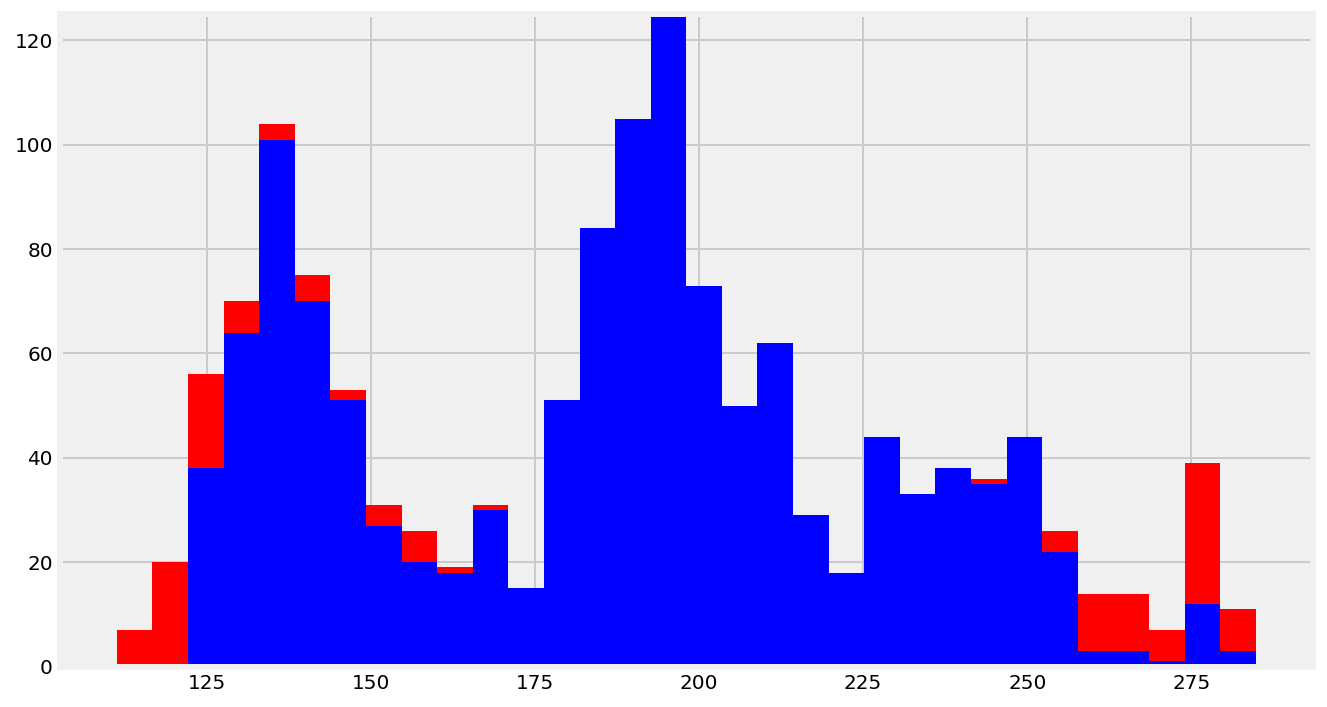

In [32]:
px_last = df_crosscorrelated['PX_LAST'].values
a = px_last[np.where(outliers==1)[0]]
b = px_last[np.where(outliers==-1)[0]]

fig, axs = plt.subplots(figsize=(10,6))
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'])
plt.show()

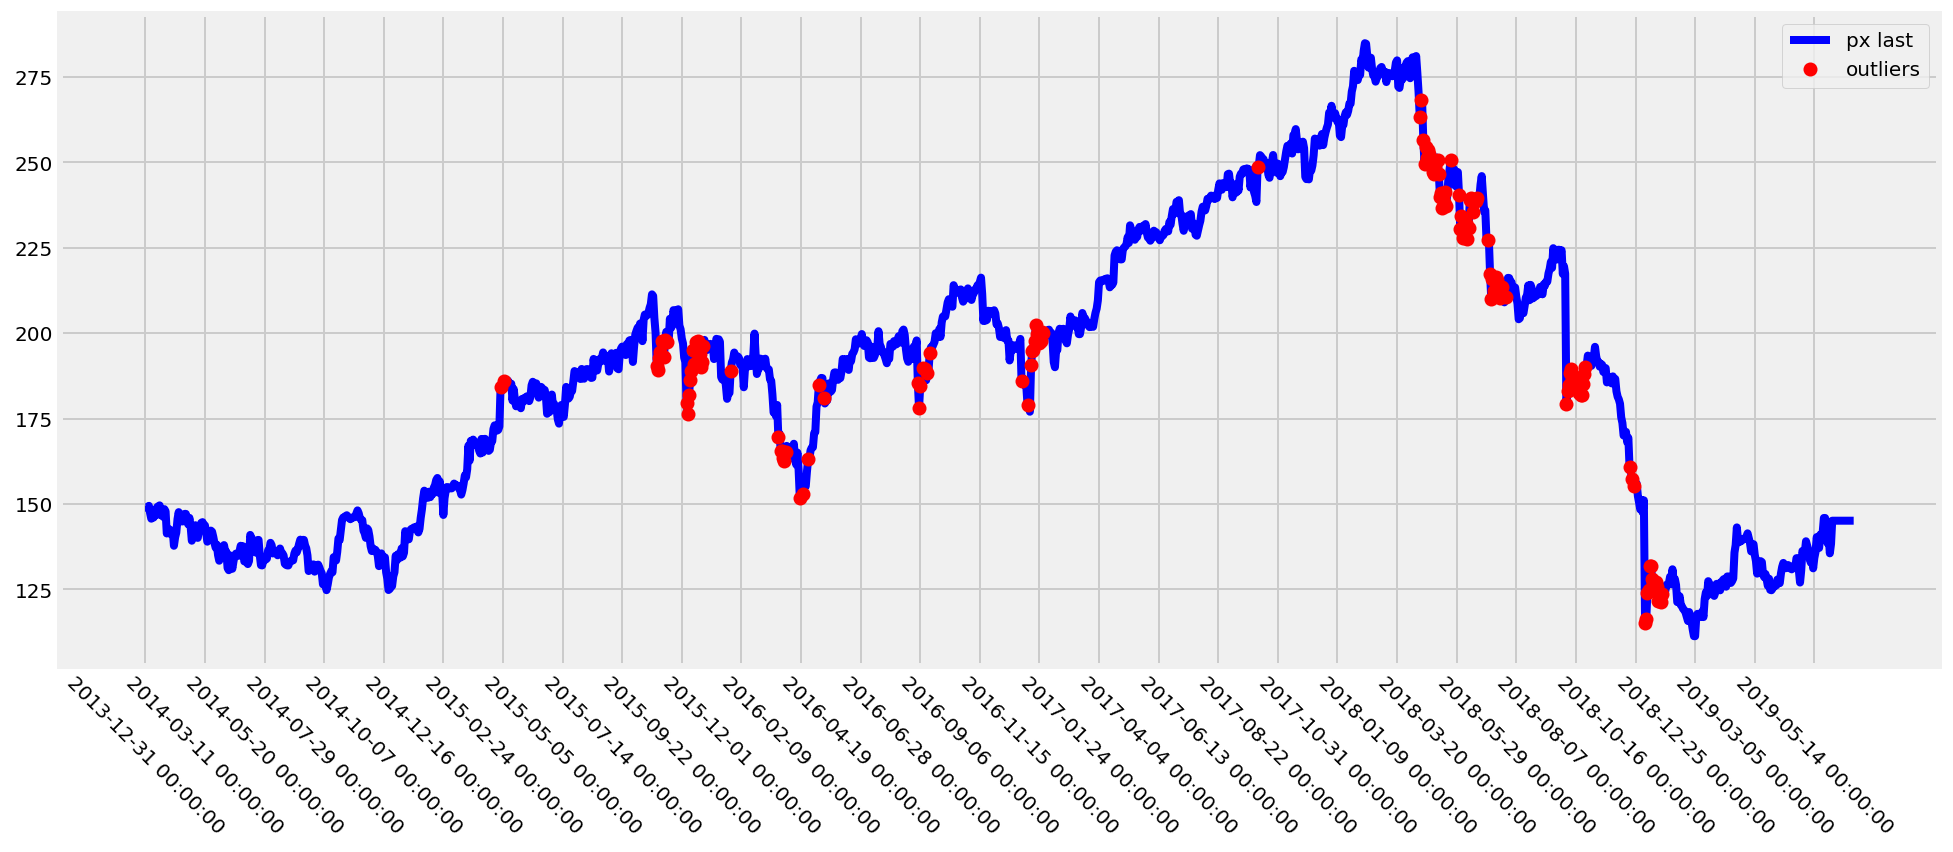

In [33]:
from sklearn.covariance import EllipticEnvelope

envelope = EllipticEnvelope(contamination = outliers_fraction)
X = df_crosscorrelated.iloc[:,1:].dropna().values
np_scaled = StandardScaler().fit_transform(X)
envelope.fit(np_scaled)
outliers = envelope.predict(np_scaled)

plt.figure(figsize=(15, 6))
plt.plot(df_crosscorrelated['PX_LAST'], label='px last',c='b')
plt.plot(df_crosscorrelated['PX_LAST'], 'o', label='outliers',
         markevery=(np.where(outliers==-1)[0] + ori_len).tolist(),c='r')
plt.xticks(np.arange(df_crosscorrelated.shape[0])[::50],df_crosscorrelated['DATA'][::50],rotation='-45')
plt.legend()
plt.show()

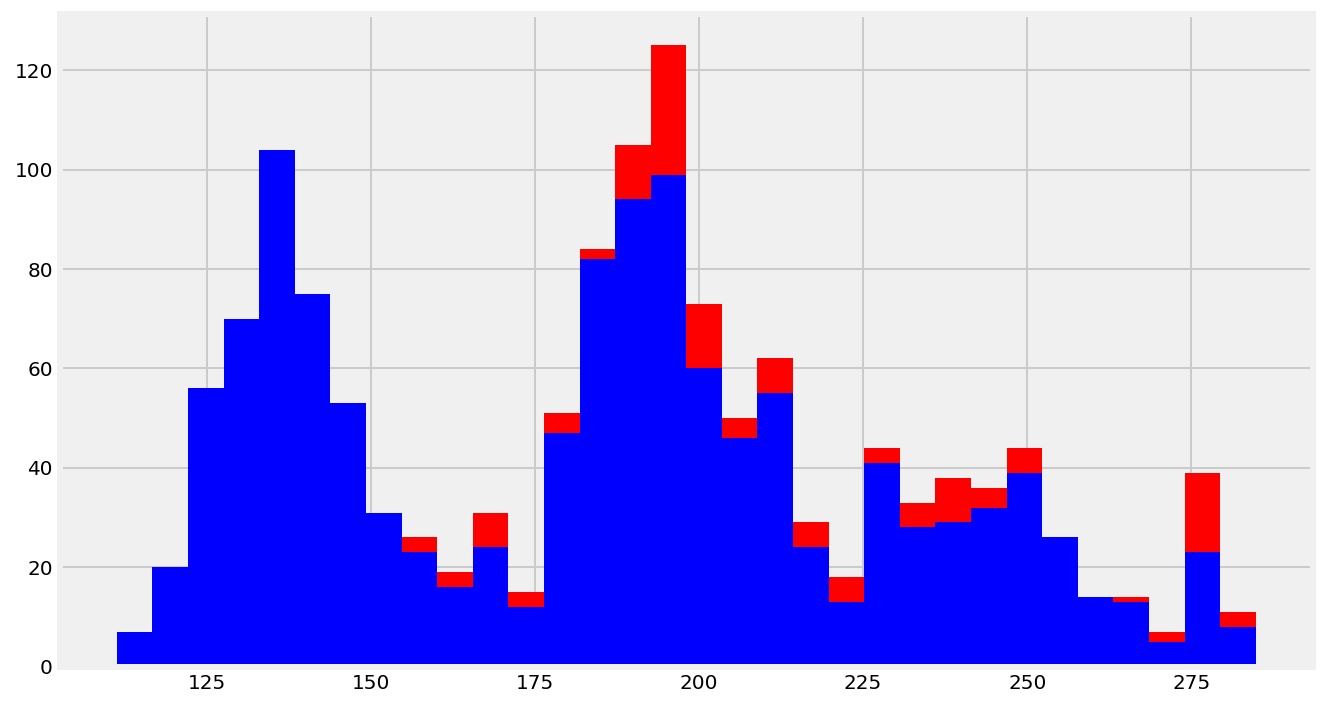

In [34]:
px_last = df_crosscorrelated['PX_LAST'].values
a = px_last[np.where(outliers==1)[0]]
b = px_last[np.where(outliers==-1)[0]]

fig, axs = plt.subplots(figsize=(10,6))
axs.hist([a,b], bins=32, stacked=True, color=['blue', 'red'])
plt.show()